In [2]:
#!pip install ipykernel 
#!pip install pandas
!pip install matplotlib

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('ad+campaign_raw.csv')



In [4]:
df.shape

(1800, 8)

In [5]:
df.columns

Index(['date', 'platform', 'campaign_type', 'ad_spend', 'revenue',
       'conversions', 'impressions', 'clicks'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1800 non-null   object 
 1   platform       1800 non-null   object 
 2   campaign_type  1800 non-null   object 
 3   ad_spend       1800 non-null   float64
 4   revenue        1800 non-null   float64
 5   conversions    1800 non-null   int64  
 6   impressions    1800 non-null   int64  
 7   clicks         1800 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 112.6+ KB


In [7]:
df.head()

,date,platform,campaign_type,ad_spend,revenue,conversions,impressions,clicks
0,2024-01-21,Google Ads,Search,2662.38,4803.43,159,59886,2113
1,2024-01-22,TikTok Ads,Search,6159.60,64126.68,411,135608,5220
2,2024-06-15,TikTok Ads,Video,5092.35,10489.07,267,92313,5991
3,2024-01-02,TikTok Ads,Shopping,7834.20,50505.07,296,83953,5935
4,2024-02-22,TikTok Ads,Search,8663.77,3369.53,107,91807,4489


In [8]:
#inspecting the columns that we are using
df[['ad_spend', 'revenue', 'conversions']].head()

,ad_spend,revenue,conversions
0,2662.38,4803.43,159
1,6159.60,64126.68,411
2,5092.35,10489.07,267
3,7834.20,50505.07,296
4,8663.77,3369.53,107


In [9]:
#inspecting zeros in conversion 

(df['conversions'] == 0).sum()

np.int64(0)

In [10]:
# recomputing roas 
#ROAS = revenue / ad_spend

df['roas'] = df['revenue']/ df['ad_spend']

In [11]:
df.head()

,date,platform,campaign_type,ad_spend,revenue,conversions,impressions,clicks,roas
0,2024-01-21,Google Ads,Search,2662.38,4803.43,159,59886,2113,1.804186
1,2024-01-22,TikTok Ads,Search,6159.60,64126.68,411,135608,5220,10.410851
2,2024-06-15,TikTok Ads,Video,5092.35,10489.07,267,92313,5991,2.059770
3,2024-01-02,TikTok Ads,Shopping,7834.20,50505.07,296,83953,5935,6.446742
4,2024-02-22,TikTok Ads,Search,8663.77,3369.53,107,91807,4489,0.388922


In [12]:
# recomputing CPA

df['cpa'] = df['ad_spend']/df['conversions']

In [13]:
df.head()

,date,platform,campaign_type,ad_spend,revenue,conversions,impressions,clicks,roas,cpa
0,2024-01-21,Google Ads,Search,2662.38,4803.43,159,59886,2113,1.804186,16.744528
1,2024-01-22,TikTok Ads,Search,6159.60,64126.68,411,135608,5220,10.410851,14.986861
2,2024-06-15,TikTok Ads,Video,5092.35,10489.07,267,92313,5991,2.059770,19.072472
3,2024-01-02,TikTok Ads,Shopping,7834.20,50505.07,296,83953,5935,6.446742,26.466892
4,2024-02-22,TikTok Ads,Search,8663.77,3369.53,107,91807,4489,0.388922,80.969813


In [14]:
df['cpa'].isnull().sum()

np.int64(0)

In [15]:
df[[ 'roas','cpa']].describe()

,roas,cpa
count,1800.000000,1800.000000
mean,6.450201,46.608914
std,6.591142,41.185553
min,0.132387,4.798889
25%,2.166755,20.206032
50%,4.294903,33.373914
75%,8.208720,56.810807
max,49.004157,335.864444


In [16]:
df[['roas' , 'cpa']].isnull().sum()

roas    0
cpa     0
dtype: int64

In [17]:
# platform wise cpa distribution

cpa_data = df['cpa'].dropna()

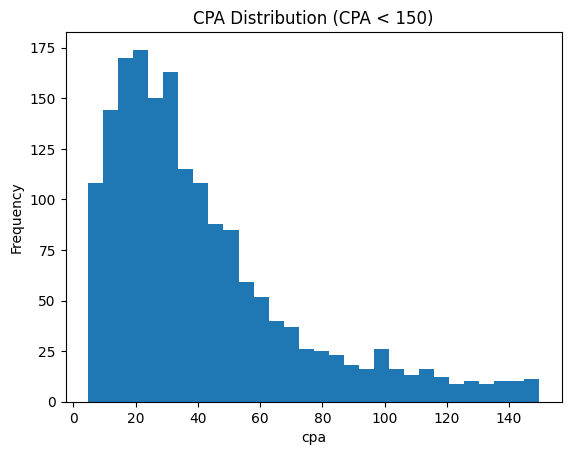

In [18]:
plt.figure()
plt.hist(cpa_data[cpa_data < 150], bins= 30)
plt.xlabel('cpa')
plt.ylabel('Frequency')
plt.title('CPA Distribution (CPA < 150)')
plt.show()

In [19]:
# Box plot for identifying which platform is causing the long tail

# drop na 
df_box= df[['platform', 'cpa']].dropna()

C:\Users\devan\AppData\Local\Temp\ipykernel_2360\3621914466.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


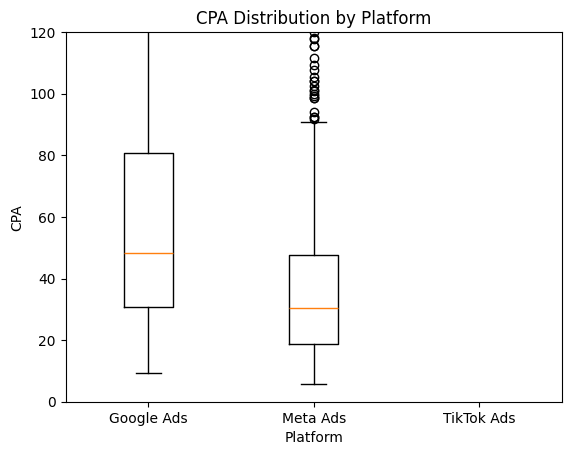

In [20]:
#Split CPA by Platform 

#one cpa series per platform
google_cpa = df_box[df_box['platform'] == 'Google Ads']['cpa']
meta_cpa = df_box[df_box['platform'] == 'Meta Ads']['cpa']
tiktok_cpa = df_box[df_box['platform'] == 'Tikok Ads']['cpa']

#creating the box plot 

plt.figure()

plt.boxplot(
    [google_cpa, meta_cpa, tiktok_cpa],
    labels=['Google Ads', 'Meta Ads', 'TikTok Ads']
)

plt.ylim(0, 120)   # zoom range
plt.xlabel('Platform')
plt.ylabel('CPA')
plt.title('CPA Distribution by Platform')

plt.show()



C:\Users\devan\AppData\Local\Temp\ipykernel_2360\773585027.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


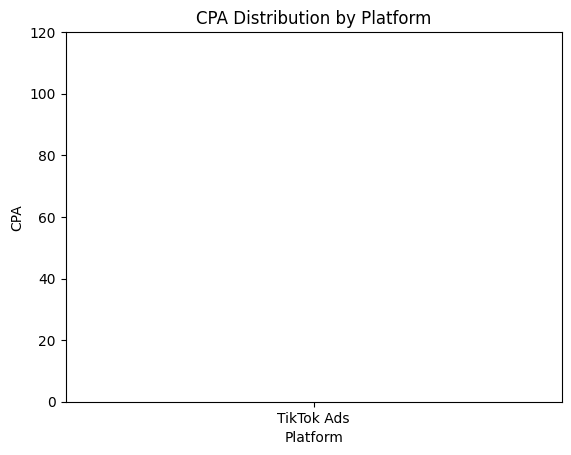

In [21]:
plt.figure()

plt.boxplot(
    [ tiktok_cpa],
    labels=['TikTok Ads']
)

plt.ylim(0, 120)   # zoom range
plt.xlabel('Platform')
plt.ylabel('CPA')
plt.title('CPA Distribution by Platform')

plt.show()

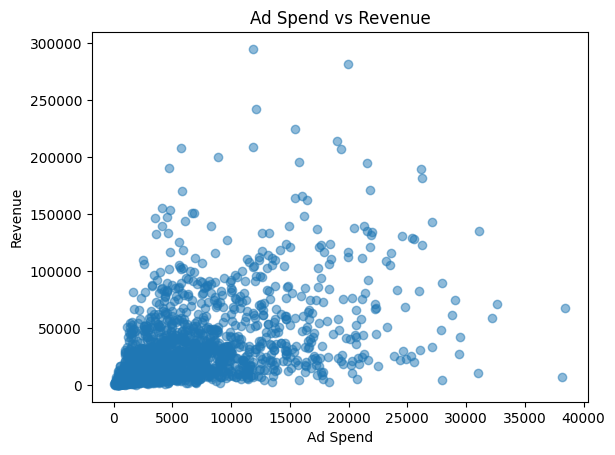

In [22]:
# Scatter plot spend VS revenue 
plt.figure()
plt.scatter(df['ad_spend'], df['revenue'], alpha=0.5)
plt.xlabel('Ad Spend')
plt.ylabel('Revenue')
plt.title('Ad Spend vs Revenue')
plt.show()


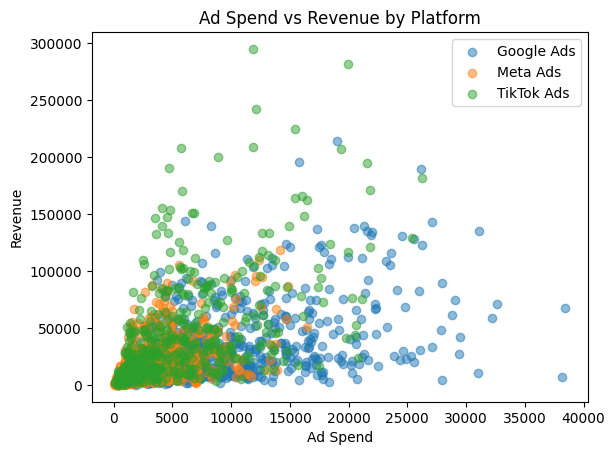

In [23]:
# Scatter by platform

plt.figure()

plt.scatter(
    df[df['platform'] == 'Google Ads']['ad_spend'],
    df[df['platform'] == 'Google Ads']['revenue'],
    label='Google Ads',
    alpha=0.5
)

plt.scatter(
    df[df['platform'] == 'Meta Ads']['ad_spend'],
    df[df['platform'] == 'Meta Ads']['revenue'],
    label='Meta Ads',
    alpha=0.5
)

plt.scatter(
    df[df['platform'] == 'TikTok Ads']['ad_spend'],
    df[df['platform'] == 'TikTok Ads']['revenue'],
    label='TikTok Ads',
    alpha=0.5
)

plt.xlabel('Ad Spend')
plt.ylabel('Revenue')
plt.title('Ad Spend vs Revenue by Platform')
plt.legend()
plt.show()


In [33]:
overall_roas = df['revenue'].sum() / df['ad_spend'].sum()
overall_roas


np.float64(4.877536648908145)

In [36]:
df['conversions'].sum()

np.int64(326812)

In [37]:
df['ad_spend'].sum()

np.float64(11108749.09)